*Answer-1:*

We have:  $probability,~p$ = $\alpha \Delta t$ $< < 1$.

a) $N_0 = 100$, $\alpha = 0.01~s^{-1}$, $\Delta t = 1 s $

b) $N_0 = 5000$, $\alpha = 0.03~s^{-1}$, $\Delta t = 1 s$

We show the results on both $linear$ and $logarithmic$ scales for times between $0$ and $300~secs$.

In each case, we also plot the expected theoretical plots.

In [76]:
import matplotlib.pyplot as plt
import random
from math import *
from itertools import repeat 

In [77]:
#The code for the theoretical expected curves.
p1 = 0.01; p2 = 0.03; dt = 1
n1 = 100; n2 = 5000; t = 0

yval1 = []; xval1 = []; lnY1 = []   #for determining the theoretical values.
yval2 = []; xval2 = []; lnY2 = []
while t < 300:
    #print(t,n)
    n1 += -n1*p1*dt         #new values after each decay.
    n2 += -n2*p2*dt
    t += dt
    yval1.append(n1)
    yval2.append(n2)
    xval1.append(t)
    xval2.append(t)  
    lnY1.append(log(n1))
    lnY2.append(log(n2)) 

*Here is the Actual Code for Simulating the Radioactive Decay.*

In [78]:
def decay(N_0, A, T_min, T_max, dt):        #defining the function for decay.
    try: 
        Tval = []                               #creating blank lists for datas.
        for i in range(0, int(T_max/dt)):
            x = T_min + i*dt
            Tval.append(x)
        Nval = list(repeat(0, len(Tval)))
        #defining the parameters.
        p, Nval[0] = A*dt, N_0
        for i in range(1, T_max, dt):           #putting the conditions.
            Nval[i] = Nval[i-1]
            for _ in range(Nval[i-1]):
                random_value = random.random()
                if random_value < p:
                    Nval[i] -= 1 
        return Nval, Tval 
    except ZeroDivisionError:
        print("Please select correct values of the parameters.") 
    

**For the Other case of $N_0 = 100$, we have:**

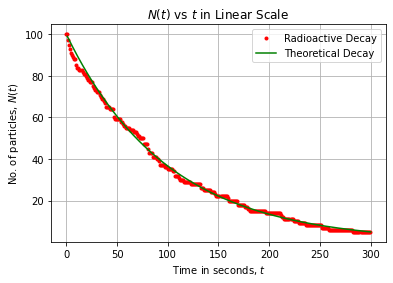

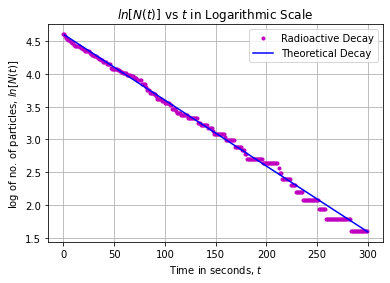

In [94]:
N_0 = 100; A = 0.01; T_max = 300; T_min = 0; dt =1          #the given values and parameters.
Nval, Tval = decay(N_0, A, T_min, T_max, dt) 
plt.plot(Tval, Nval,'.r', label = "Radioactive Decay")   
plt.plot(xval1, yval1,'-g', label = "Theoretical Decay")  
plt.title("$N(t)$ vs $t$ in Linear Scale")
plt.xlabel("Time in seconds, $t$")
plt.ylabel("No. of particles, $N(t)$") 
plt.legend(loc='upper right') 
plt.grid()   
plt.show() 

# the logarithmic scale.

ln1 = [] 
for i in Nval:
    if i != 0:
        ln1.append(log(i))
    elif i == 0:
        ln1.append(0)  
plt.plot(Tval, ln1,'.m', label = "Radioactive Decay")   
plt.plot(xval1, lnY1,'-b', label = "Theoretical Decay")  
plt.title("$ln[N(t)]$ vs $t$ in Logarithmic Scale")
plt.xlabel("Time in seconds, $t$")
plt.ylabel("log of no. of particles, $ln[N(t)]$") 
plt.legend(loc='upper right') 
plt.grid()   
plt.show()

**For the Other case of $N_0 = 5000$, we have:**

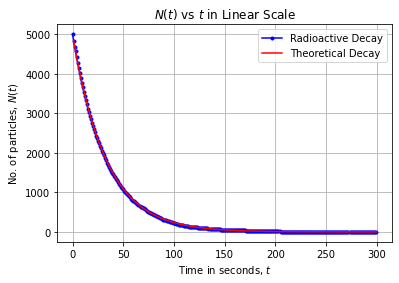

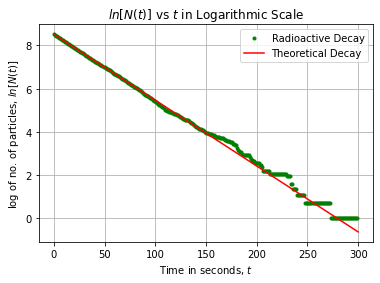

In [98]:
N_0 = 5000; A = 0.03; T_max = 300; T_min = 0; dt =1
Nval, Tval = decay(N_0, A, T_min, T_max, dt) 
plt.plot(Tval, Nval,'.-b', label = "Radioactive Decay")
plt.plot(xval2, yval2,'-r', label = "Theoretical Decay")    
plt.title("$N(t)$ vs $t$ in Linear Scale") 
plt.xlabel("Time in seconds, $t$")
plt.ylabel("No. of particles, $N(t)$") 
plt.legend(loc='upper right') 
plt.grid()   
plt.show()

# the logarithmic scale.

ln2 = [] 
for i in Nval:
    if i != 0:
        ln2.append(log(i))
    elif i == 0:
        ln2.append(0) 
plt.plot(Tval, ln2,'.g', label = "Radioactive Decay")   
plt.plot(xval2, lnY2,'-r', label = "Theoretical Decay")  
plt.title("$ln[N(t)]$ vs $t$ in Logarithmic Scale")
plt.xlabel("Time in seconds, $t$")
plt.ylabel("log of no. of particles, $ln[N(t)]$") 
plt.legend(loc='upper right') 
plt.grid()   
plt.show()

*Answer-2:*

We have:

a) $N_0 = 500$, $a = 4\times10^{-5}, ~s^{-1}$
$\Delta t = 10 s $, $ T = 100 ~sec$

b) $N_0 = 500$, $a = 2\times 10^{-5}, s^{-1}$
$\Delta t = 10 s$, $T=100$ sec

In each case, show the distribution using 1000 experiments and overlay the expected Poisson distributions.

In [99]:
import matplotlib.pyplot as plt
import random
import math
import statistics
#from itertools import repeat
import numpy as np 

**For $\alpha = 0.00004$**

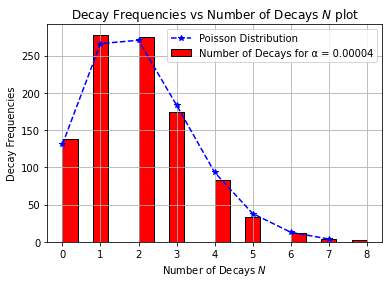

In [109]:
def decay(N_0, alpha, delta_t, time):   #defining the function to count the decays.
  N = []; total_decay = 0; time = np.arange(0, 100, delta_t)    #defining the parameters.
  for i in time:
    N.append(N_0)
    decay_value = 0         #creating the list for counts.
    for j in range(N_0):
      p = random.random()
      if p < alpha*delta_t:     #defining the conditions.
        decay_value += 1
    N_0 -= decay_value
    total_decay += decay_value
  return N, total_decay

#The values as given in question.
N_0 = 500; alpha = 0.00004; delta_t = 10; time = 100
decay_list = [0 for m in range(1000)] 

for m in range(len(decay_list)):      #retrieving the datas.
  N_list, decay_list[m] = decay(N_0, alpha, delta_t, time)

val = statistics.variance(decay_list)

frequency = [i for i in range(max(decay_list))]   #for getting the Poisson Distribution.
lol = [(1000)*(val)**k*math.exp(-val)/math.factorial(k) for k in frequency] 

plt.plot(frequency, lol, '--*b', label = 'Poisson Distribution') 
plt.hist(decay_list, color = 'red', ec = 'black', bins = 20, label = 'Number of Decays for α = 0.00004') 
plt.title("Decay Frequencies vs Number of Decays $N$ plot")
plt.xlabel("Number of Decays $N$")
plt.ylabel("Decay Frequencies") 
plt.legend(loc='upper right')
plt.grid()   
plt.show()

**For $\alpha = 0.00002$**

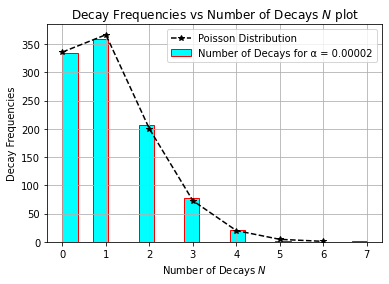

In [129]:
#The values as given in question.
N_0 = 500; alpha = 0.00002; delta_t = 10; time = 100
decay_list = [0 for m in range(1000)] 

for m in range(len(decay_list)):      #retrieving the datas.
  N_list, decay_list[m] = decay(N_0, alpha, delta_t, time)

val = statistics.variance(decay_list)

frequency = [i for i in range(max(decay_list))]   #for getting the Poisson Distribution.
lol = [(1000)*(val)**k*math.exp(-val)/math.factorial(k) for k in frequency] 

plt.plot(frequency, lol, '--*k', label = 'Poisson Distribution') 
plt.hist(decay_list, color = 'cyan', ec = 'red', bins = 20, label = 'Number of Decays for α = 0.00002')
plt.title("Decay Frequencies vs Number of Decays $N$ plot")
plt.xlabel("Number of Decays $N$")
plt.ylabel("Decay Frequencies") 
plt.legend(loc='upper right')
plt.grid()   
plt.show() 

*Answer-3:*

The function is of the form: $f(\theta) = \dfrac{1}{(\sin^2 \theta + a\cdot \cos^2 \theta)}$

where $a = 0.5$ and $0.001$ respectively and $0 \leq \theta \leq \pi$. We should have for $10,000$ trials for each value of $a$. 

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import math

*Acceptance-Rejection Method.*

**For a = 0.5, I have shown both the Actual plot and the Theoretical Plot together.**

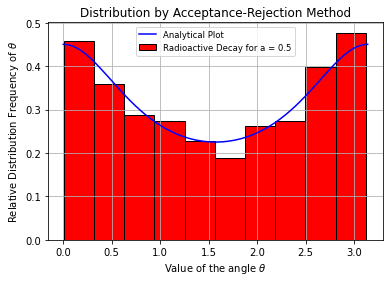

In [140]:
a = 0.5         #value of a = 0.5
x = np.random.uniform(0, math.pi, 10000)        #selecting random number between 0 and π.
u = np.random.uniform(0, math.pi, 10000)        #selecting another unique random number between 0 and π.
f = 1/((np.sqrt(1/a)*(np.pi))*(np.sin(x)**2 + a*np.cos(x)**2))           #conditions which need to be satisfied.
g = x[f>=2*u] 
plt.hist(g, ec = 'black', label='Radioactive Decay for a = 0.5', color = 'red', density = True)   #plotting the normalised Histogram.
x_1 = np.arange(0, math.pi, 0.005)        #theoretical calculations.
y_1 = 1/((np.sqrt(1/a)*(np.pi))*(np.sin(x_1)**2 + 0.5*np.cos(x_1)**2))
plt.plot(x_1, y_1, '-b', label = "Analytical Plot") 
plt.title("Distribution by Acceptance-Rejection Method")
plt.xlabel("Value of the angle $θ$")
plt.ylabel("Relative Distribution Frequency of $θ$") 
plt.legend(loc='upper center', prop={'size': 8.5}) 
plt.grid()   
plt.show() 

**For a = 0.001, I have shown both the Actual plot and the Theoretical Plot together.**

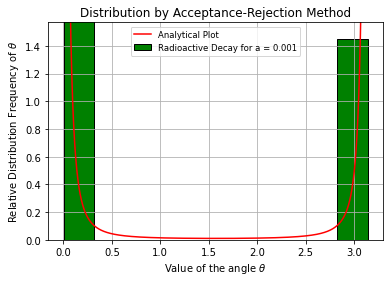

In [149]:
a = 0.001                                       #value of a = 0.001
x = np.random.uniform(0, math.pi, 100000)        #selecting random number between 0 and π.
u = np.random.uniform(0, math.pi, 100000)        #selecting another unique random number between 0 and π.
f = 1/((np.sqrt(1/a)*(np.pi))*(np.sin(x)**2 + a*np.cos(x)**2))           #conditions which need to be satisfied.
g = x[f>=1000*u] 
plt.hist(g, ec = 'black', label='Radioactive Decay for a = 0.001', color = 'green', density = True)     #plotting the Histogram.
x_1 = np.arange(0, math.pi, 0.0001)        #theoretical calculations.
y_1 = 1/((np.sqrt(1/a)*(np.pi))*(np.sin(x_1)**2 + a*np.cos(x_1)**2))
plt.plot(x_1, y_1, '-r', label = "Analytical Plot") 
plt.ylim(0, 1.57)
plt.title("Distribution by Acceptance-Rejection Method")
plt.xlabel("Value of the angle $θ$")
plt.ylabel("Relative Distribution Frequency of $θ$") 
plt.legend(loc='upper center', prop={'size': 8.5})
plt.grid()   
plt.show()

*Inversion Method.*

Inversion Technique for $a=0.5$ and $a=0.001$:

We have the function as: $$f(\theta)=\frac{1}{\sin^2\theta+a\cdot \cos^2 \theta}$$

which is not normalised. So, we need to normalise it by multiplying it with a Normalisation Constant.

The Normalisation Constant is given as: $\dfrac{\sqrt{a}}{\pi}$.

So, the normalised function is $${F(\theta)=\frac{\sqrt{a}}{\pi}\bigg(\frac{1}{\sin^2\theta+a\cdot \cos^2 \theta}}\bigg)~~~~~\{0\leq\theta\leq\pi\}$$
and also $$\int_{0}^{\pi}{F(\theta)} d\theta = 1 $$

So, we have the function $F(\theta)$ as:

$$F(\theta) = \dfrac{1}{\pi} \tan^{-1}\bigg( \dfrac{\tan\theta}{\sqrt{a}} \bigg)~~~~~~~~\bigg\{0 < u < \dfrac{\pi}{2}\bigg\}$$

And 
$$F(\theta) = \dfrac{1}{\pi} \tan^{-1}\bigg( \dfrac{\tan\theta}{\sqrt{a}} \bigg)+1 ~~~~~~~~\bigg\{\dfrac{\pi}{2} < u < \pi\bigg\}$$ 

Also we found if $x=\text{random number between 0 to 1}$ then doing the inversion will give us :
$$\theta = \tan^{-1}({\sqrt{a}}\tan (\pi x))~~~~~~~~\{0<x<0.5\}$$

And
$$\theta = \tan^{-1}({\sqrt{a}}\tan (\pi (x - 1))~~~~~~~~\{0.5<x<1\}$$

**For a = 0.5, I have shown both the Actual plot and the Theoretical Plot together.**

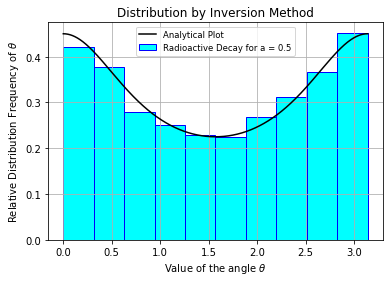

In [150]:
a = 0.5; x = np.random.uniform(size=10000)  #defining the parameters and values.
theta = np.empty(x.size)
for m in range(theta.size):     #defining the conditions.
    if 0 <= x[m] < 0.5:
        theta[m] = np.arctan(np.sqrt(a)*np.tan(np.pi*x[m])) 
    elif 0.5 <= x[m] <= 1:
        theta[m] = np.arctan(np.sqrt(a)*np.tan(np.pi*(x[m]-1))) + np.pi
    else:
        print('Please check your values')
x_1 = np.arange(0, np.pi, 0.0001)       #theoretical values.
y_1 = 1/((np.sqrt(1/a)*(np.pi))*(np.sin(x_1)**2 + a*np.cos(x_1)**2))
plt.hist(theta, ec = 'blue', label='Radioactive Decay for a = 0.5', color = 'cyan', density = True)     #plotting the Histogram.
plt.plot(x_1, y_1, '-k', label = "Analytical Plot")         #plotting the theoretical values.
#plt.ylim(0, 1.57)
plt.title("Distribution by Inversion Method")
plt.xlabel("Value of the angle $θ$")
plt.ylabel("Relative Distribution Frequency of $θ$")  
plt.legend(loc='upper center', prop={'size': 8.5})
plt.grid()   
plt.show()

**For a = 0.001, I have shown both the Actual plot and the Theoretical Plot together.**

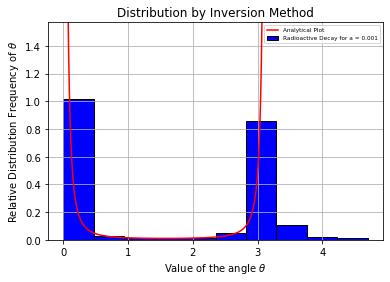

In [155]:
a = 0.001; x = np.random.uniform(size=10000)            #defining the parameters and values.
theta = np.empty(x.size)
for m in range(theta.size):                             #defining the conditions.
    if 0 <= x[m] < 0.5:                                 
        theta[m] = np.arctan(np.sqrt(a)*np.tan(np.pi*x[m])) 
    elif 0.5 <= x[m] <= 1:
        theta[m] = np.arctan(np.sqrt(a)*np.tan(np.pi*x[m]-1)) + np.pi
    else:
        print('Please check your values')
x_1 = np.arange(0, np.pi, 0.0001)               #theoretical values.
y_1 = 1/((np.sqrt(1/a)*(np.pi))*(np.sin(x_1)**2 + a*np.cos(x_1)**2))
plt.hist(theta, ec = 'black', label='Radioactive Decay for a = 0.001', color = 'blue', density = True)     #plotting the Histogram.
plt.plot(x_1, y_1, '-r', label = "Analytical Plot")         #plotting the theoretical values.
plt.ylim(0, 1.57)
plt.title("Distribution by Inversion Method") 
plt.xlabel("Value of the angle $θ$")
plt.ylabel("Relative Distribution Frequency of $θ$") 
plt.legend(loc='upper right', prop={'size': 5.8})
plt.grid()   
plt.show()

$$---The~End---$$